# Лабораторная работа 2, ПМИ 2023/24, I курс, М+, дискретная математика.
Это ноутбук с задачами, которые будут проверяться вручную. При решении задач можно использовать всю стандартную библиотеку Python, а также NetworkX, Matplotlib, numpy и их зависимости. Использование любых других сторонних библиотек запрещено.

При решении ноутбука вам потребуется писать доказательства. Убедительная просьба аккуратно оформлять математические выкладки:
- всё, что не является кодом, в ноутбуке должно быть в Markdown ячейках
- в Markdown можно писать $\LaTeX$-овские математические формулы:
  - однострочные: `$f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$`: $f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$
  - многострочные: `$$f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$$`: $$f(x_1, \dots, x_n) = \bigwedge_{i=1}^n x_i$$
  - упоминание любых математических объектов так же желательно писать в `$...$`, даже если их названия однобуквенные, например:

> Функция $f$ непрерывна по переменной $x$ на множестве $A \subseteq \mathbb{R}^2$...
  
Пожалуйста, используйте эти возможности Jupyter Notebook. В этой работе не будет громоздких выкладок, поэтому их оформление не должно вызвать затруднений.
  
Удачи!

# Задание 1. Случайные раскраски графов (1.5 балла)
Вас уже давно мучает мысль, что ваш город — серый и унылый. Но сегодня пришло время это исправить! Вооружившись балончикоми с красками, вы выходите из дома и полны решимости расцветить город.  

Город в котором вы живете — это простой неориентированный граф. Вы законопослушный гражданин, поэтому хотите, чтобы раскраска была как можно более _правильной_. Напомним, что раскраска вершин графа называется _правильной_, если никакие две одноцветные вершины не являются смежными.

В вашем распоряжении $n$ красок. Каждая вершина графа раскрашивается равновероятно в один из цветов.

_Задание_. Напишите функцию `random_coloring_impropriety`, которая генерирует случайную вершинную раскраску графа на $n$ цветах и возвращает _неправильность_ раскраски — количество ребер графа, у которых инцидентные им вершины раскрашены в одинковый цвет. Из опредедения следует, что раскраска правильная, если её неправильность равна нулю.

_Замечание_: обычно неправильностью раскраски называют другую величину, а именно максимум из неправильностей вершин. Неправильностью вершины называют число смежных с ней вершин того же цвета. Несложно понять, что в нашем определении неправильность — это полусумма неправильностей вершин.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def random_coloring_impropriety(G: nx.Graph, n: int) -> int:
    colors = np.random.randint(n, size=len(G.nodes))
    res = 0
    for edge in G.edges():
        if colors[edge[0]] == colors[edge[1]]:
            res += 1
    return res

Теперь возьмите какой-нибудь граф $G$ (можно, например, сгенерировать граф с помощью какого-нибудь из [генераторов](https://networkx.org/documentation/stable/reference/generators.html), доступных в Networkx) и с помощью _метода Монте-Карло_ найдите распределение неправильности раскраски. Для этого многократно ($A$ раз) вызовите функцию `random_coloring_impropriety` и примите вероятность значения $x$ равной $\frac{A_x}{A}$, где $A_x$ — это то, сколько раз среди $A$ запусков функция вернула значение $x$. Визуализируйте полученное распределение с помощью Matplotlib.

(-0.8254895878866566,
 1.1734628115186416,
 -0.6725250405942819,
 0.7738792158268335)

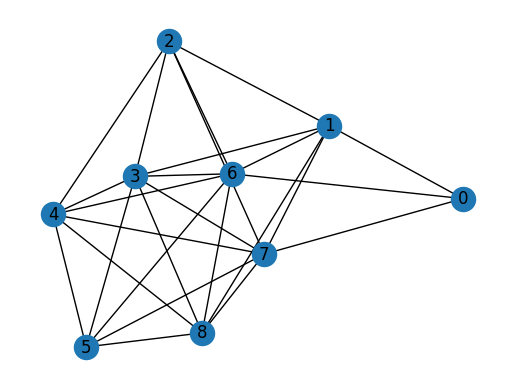

In [3]:
n = np.random.randint(6, 10)
m = np.random.randint(n, n * (n - 1) // 2)
G = nx.dense_gnm_random_graph(n, m)

layout = nx.spring_layout(G)
nx.draw_networkx(G, layout)
plt.axis("off")

In [4]:
cnt = [0] * (m + 1)
A = 100000
col = 3
for i in range(A):
    cnt[random_coloring_impropriety(G, col)] += 1
for i in range(m + 1):
    cnt[i] /= A

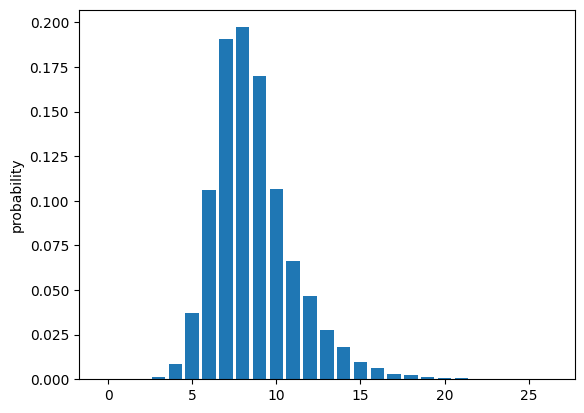

In [5]:
fig, ax = plt.subplots()

imp = [i for i in range(m + 1)]
bar_labels = [i for i in range(m + 1)]
bar_colors = ['tab:blue' for i in range(m + 1)]

ax.bar(imp, cnt, label=bar_labels, color=bar_colors)

ax.set_ylabel('probability')

plt.show()

_Задача_: пусть $G$ — дерево на $m$ вершинах, а количество цветов равно $2$. Найдите распределение неправильности в этом случае, т.е. для каждого возможного значения неправильности найдите вероятность достижения этого значения.

_Решение_:
Пусть неправильность графа равна $k$. Надо найти $P(impropriety=k)$. Давайте выберем $k$ ребер, у которых концы одного цвета. Заметим, что существует ровно две раскраски, у которых ровно эти ребра с концами одного цвета. Действительно, подвесим дерево за вершину 1 и покрасим ее в один из цветов. Далее будет спускаться по графу по уровням, крася постепенно вершины. Заметим, что каждый раз покрасить вершину ровно один вариант, так как ее родительское ребро либо плохое - и тогда в тот же цвет, что и родителя, либо хорошее, тогда в другой цвет. Ясно, что в конце покраска будет удовлетворять выбору ребер, так как мы так красили. И так как дерево, то каждое ребро обработаем. Так как 1 вершину 2 способа покрасить, то всего две раскраски. И так как у любой раскраски с неправильностью $k$ какие-то $k$ ребер с одноцветными концами, и для любого подмножества из $k$ ребер 2 раскраски - то всего покрасок с неправильностью $k$ -  $C_{m-1}^{k} * 2$ - сколько способов выбрать подмножество размера $k$ и умножить на два, так как два способа. Ну и так как всего раскрасок $2^m$, то так как равновероятны раскраски, то $$P(impropriety=k) = \frac{C_{m-1}^{k}}{2^{m-1}}$$

# Задание 2. Отношения (1.5 балла)
Нет, всё куда более прозаично. Хотя, возможно, не менее сложно.

Даны три конечных множества $K, M, N$ и бинарные отношения $A \subseteq K \times N$ и $B \subseteq K \times M$ на них. Требуется решить уравнение $A = X \circ B$, т.е. либо найти такое отношение $X \subseteq M \times N$, что $A = X \circ B$, либо проверить, что такого отношения нет.

_Задание_: реализуйте функцию `solve_binary_relation_equation`, которая принимает матрицы  $A \in M_{|K| \times |N|}(\mathbb{B})$ и $B \in M_{|K| \times |M|}(\mathbb{B})$, где $\mathbb{B} = \{ \texttt{False}, \texttt{True} \}$, задающие отношения $A$ и $B$ соответственно ($x A y$, если `A[x][y] == 1`). Функция должна вернуть матрицу $X \in M_{|M| \times |N|}(\mathbb{B})$, задающее отношение $X$, либо `None`, если решения не существует. Если решений несколько, можно вернуть любое.

In [6]:
import numpy as np

In [7]:
def solve_binary_relation_equation(A: np.ndarray, B: np.ndarray) -> np.ndarray | None:
    k = np.shape(A)[0]
    m = np.shape(B)[1]
    n = np.shape(A)[1]
    X = np.ones((m, n), dtype=bool)
    for j in range(n):
        for i in range(k):
            if A[i][j] == False:
                for w in range(m):
                    if B[i][w] == True:
                        X[w][j] = False
        for i in range(k):
            if A[i][j] == True:
                ok = 0
                for w in range(m):
                    if B[i][w] == True and X[w][j] == True:
                        ok = 1
                        break
                if ok == 0:
                    return None
    return X


Пример:
$$ K = \{ k_1, k_2 \}, M = \{ m_1, m_2 \}, N = \{ n_1, n_2, n_3 \} $$
$$ A = \{ (k_1, n_1), (k_1, n_3), (k_2, n_1) \}, B = \{ (k_1, m_1), (k_2, m_2) \} $$
Тогда единственное решение $A = X \circ B$ такое: $$X = \{ (m_1, n_1), (m_1, n_3), (m_2, n_1) \} $$

In [ ]:
for _ in range(1000):
    A = np.random.choice([True, False], (3, 4))
    B = np.random.choice([True, False], (3, 5))
    X = solve_binary_relation_equation(A, B)
    print(A)
    print(B)
    assert X is None or np.array_equal(B @ X, A)
A = np.array([[True, False, True], [True, False, False]])
B = np.array([[True, False], [False, True]])
X = solve_binary_relation_equation(A, B)
assert np.array_equal(B @ X, A)

Обоснуйте корректность алгоритма.

_Обоснование_:
$A = B \circ X$ как отношений, равносильно $A = BX$ как матриц в $\texttt{False}, \texttt{True}$. Действительно, если рассмотреть значение в произведении, то это сумма $\sum_{i=1}^{|M|}B[x][i]*X[i][y]$. Элемент есть в композиции, если есть $i$ что $B[x][i]$ и $X[i][y]$ $\texttt{True}$ (то есть $xBi$ и $iXy$ есть, значит по определению $xAy$ в композиции. И наоборот, $B[x][i]*X[i][y]$ не 0, если $xAy$ в композиции (так как по определению такое $i$ есть). Значит $(BX)[x][y] \neq \texttt{False}$ равносильно, что $A[x][y] = \texttt{True}$. Значит надо надо решить матричное уравнение (получается, что битовое И - это произведение, битовое ИЛИ - сумма, так как если просто сумма, то значения могут быть больше 1, а нам нужно наличие хотя бы одного $i$). Его можно решать по столбцам $A$, то есть считать, что у нас несколько систем. Вот столбец переменных и столбец значений. Сначала рассмотрим нулевые значения. Тогда все переменные с коэффиентом 1 в этой строке равны 0, иначе значение будет 1 ($1 \wedge 1 = 1$, а потом ИЛИ, которое будет 1). Значит знаем все точно нулевые значения, а остальные неважно какие, в строках с нулями точно будет 0. Тогда остальные поставим 1 все. Если строка со значением 0 вместо 1, то решений нет, так как при уменьшении количества единиц серди переменных значение в строке не станет 1, а больше единниц быть не может, так как мы занулили обязательные переменные. Если все хорошо, то решили систему, переходим дальше.

# Задание 3. Производящие функции, Pythonic edition (2 балла)

В этом задании вам требуется написать класс производящей функции. Ниже приведен интерфейс класса. Все эти методы нужно реализовать. Еще ниже приведены тесты, которые можно и нужно запускать и смотреть.

Общая концепция: в классе хранится единственное поле `func`, которое возвращает коэффициенты последовательности. Все операции над производящими функциями делаются лениво. В реализации операций не надо копировать аргументы. Реализуйте операции таким образом, чтобы они сохраняли целочисленность производящей функции, в том числе в делении, если это возможно.

In [11]:
!pip install typing
!pip install typing_extensions

In [12]:
from typing import Callable, Iterable
from typing_extensions import Self
from functools import cache

Number = int | float


class GeneratingFunction:
    __slots__ = ["func"]

    def __init__(self, func: Callable[[int], Number]):
        self.func = func

    @staticmethod
    def const(value: Number):
        return GeneratingFunction(lambda i: value if i == 0 else 0)

    @staticmethod
    def finite(values: Iterable[Number]):
        return GeneratingFunction(lambda i: values[i] if i < len(values) else 0)

    def __add__(self, other: Number | Self):
        if type(other) == GeneratingFunction:
            return GeneratingFunction(lambda i: self.func(i) + other.func(i))
        return GeneratingFunction(lambda i: self.func(i) + other if i == 0 else self.func(i))

    def __radd__(self, other: Number):
        return GeneratingFunction(lambda i: self.func(i) + other if i == 0 else self.func(i))

    def __sub__(self, other: Number | Self):
        if type(other) == GeneratingFunction:
            return GeneratingFunction(lambda i: self.func(i) - other.func(i))
        return GeneratingFunction(lambda i: self.func(i) - other if i == 0 else self.func(i))

    def __rsub__(self, other: Number):
        return GeneratingFunction(lambda i: other - self.func(i) if i == 0 else -self.func(i))

    def __mul__(self, other: Number | Self):
        if type(other) == GeneratingFunction:
            return GeneratingFunction(lambda i: sum(self.func(j) * other.func(i - j) for j in range(0, i + 1)))
        return GeneratingFunction(lambda i: self.func(i) * other)

    def __rmul__(self, other: Number):
        return GeneratingFunction(lambda i: self.func(i) * other)

    def __truediv__(self, other: Number | Self):
        if type(other) == GeneratingFunction:
            if other.func(0) == 0:
                return None
            if abs(other.func(0)) == 1:
                @cache
                def div(i: int):
                    if i == 0:
                        return self.func(0) // other.func(0)
                    res = self.func(i) // other.func(0)
                    for j in range(1, i + 1):
                        res -= other.func(j) * div(i - j) // other.func(0)
                    return res
                return GeneratingFunction(div)
            @cache
            def truediv(i: int):
                if i == 0:
                    return self.func(0) / other.func(0)
                res = self.func(i) / other.func(0)
                for j in range(1, i + 1):
                    res -= other.func(j) * truediv(i - j) / other.func(0)
                return res
            return GeneratingFunction(truediv)
        if abs(other) == 1:
            return GeneratingFunction(lambda i: self.func(i) // other)
        return GeneratingFunction(lambda i: self.func(i) / other)

    def __rtruediv__(self, other: Number):
        return GeneratingFunction.const(other) / self

    def __pow__(self, pow: int):
        if pow < 0:
            return (1 / self) ** (-pow)
        if pow == 0:
            return GeneratingFunction.const(1)
        if pow % 2 == 0:
            return (self * self) ** (pow // 2)
        return (self ** (pow - 1)) * self

    def __neg__(self):
        return GeneratingFunction(lambda i: -self.func(i))

    def __getitem__(self, key: int) -> Number | list[Number]:
        if isinstance(key, slice):
            return list(map(self.func, range(*key.indices(key.stop))))
        return self.func(key)

    def __format__(self, format_spec: str) -> str:
        res = f""
        for i in range(int(format_spec)):
            if i == 0:
                if self.func(i) != 0:
                    res += f"{self.func(i)}"
            else:
                if self.func(i) > 0 and res != f"":
                    res += f" + "
                elif self.func(i) < 0 and res != f"":
                    res += f" - "
                if self.func(i) != 0:
                    if abs(self.func(i)) != 1:
                        res += f"{abs(self.func(i))}x^{i}"
                    else:
                        res += f"x^{i}"


        return res + f" + ..."

    def __str__(self) -> str:
        return f"{self:6}"

    def derivative(self):
        return GeneratingFunction(lambda i: (i + 1) * self.func(i + 1))


In [13]:
x = GeneratingFunction.finite([0, 1])
fibb_gen = -(x ** 2 + x - 1) ** -1
print(f"{fibb_gen:11}")
assert(fibb_gen[10] == 89)

1 + x^1 + 2x^2 + 3x^3 + 5x^4 + 8x^5 + 13x^6 + 21x^7 + 34x^8 + 55x^9 + 89x^10 + ...


In [14]:
%pip install ipytest

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.7 MB/s eta 0:00:00


In [15]:
import ipytest
ipytest.autoconfig()

In [16]:
%%ipytest
from itertools import islice

def fibb(n: int):
    a, b = 1, 1
    for _ in range(n):
        a, b = b, a + b
    return a


def test_init():
    assert list(islice(GeneratingFunction(lambda x: x * x), 5)) == [0, 1, 4, 9, 16]


def test_finite():
    assert (
        list(islice(GeneratingFunction.finite([2, 4, 1, 5]), 10))
        == [2, 4, 1, 5] + [0] * 6
    )

    coeffs = range(4)
    poly = GeneratingFunction.finite(coeffs)
    assert list(islice(poly, 5)) == [0, 1, 2, 3, 0]
    assert list(islice(poly, 3)) == [0, 1, 2]


def test_const():
    assert list(islice(GeneratingFunction.const(9), 3)) == [9, 0, 0]


def test_add():
    x = GeneratingFunction.finite([1, 2, 3, 4])
    y = GeneratingFunction.finite([6, 3, 1])
    z = GeneratingFunction(lambda i: i * i)
    assert (x + y)[:5] == [7, 5, 4, 4, 0]
    assert (x + y)[10**9] == 0
    assert (z + z)[10**9] == 2 * 10**18

    assert (z + 7)[:3] == [7, 1, 4]
    assert (42 + x)[:5] == [43, 2, 3, 4, 0]


def test_sub_neg():
    a = GeneratingFunction.finite([1, 2, 3, 4])
    assert (-a)[:5] == [-1, -2, -3, -4, 0]
    assert (a - a)[:100] == [0] * 100
    assert (a - 42)[:5] == [-41, 2, 3, 4, 0]
    assert (57 - a)[:5] == [56, -2, -3, -4, 0]

    b = GeneratingFunction(lambda n: n * 9)
    assert (a - b)[10**9] == -9 * 10**9


def test_mul():
    x = GeneratingFunction.finite([0, 1])
    x2 = x * x
    poly1 = 3 * x2 - x**3 - 4
    poly2 = x * 2 + 5
    assert (poly1 * poly2)[:5] == [-20, -8, 15, 1, -2]

    f = GeneratingFunction(fibb)
    assert (-f * (x**2 + x - 1))[:100] == [1] + [0] * 99


def test_div():
    x = GeneratingFunction.finite([0, 1])
    f = -1 / (x**2 + x - 1)
    assert isinstance(f[10], int)
    assert (-1 / (x**2 + x - 1))[:100] == GeneratingFunction(fibb)[:100]
    assert (x / GeneratingFunction(fibb))[:100] == (-(x**3) - x**2 + x)[:100]
    assert isinstance((x / 1)[10], int)
    assert isinstance((f / -1)[10], int)
    assert (x / (2 * x + 2))[1] == 0.5

    assert (
        (-GeneratingFunction(fibb) ** -3)[:10]
        == ((x**2 + x - 1) ** 3)[:10]
        == [-1, 3, 0, -5, 0, 3, 1, 0, 0, 0]
    )


def test_derivative():
    x = GeneratingFunction.finite([0, 1])
    f = 1 / (1 - x)
    assert f.derivative()[:10] == list(range(1, 11))

    g = GeneratingFunction(fibb)
    assert (f * g).derivative()[:10] == (f.derivative() * g + g.derivative() * f)[:10]

........                                                                                     [100%]
8 passed in 4.60s
